
# Tutorial de Ciencia de Datos (UdeSA) 2025

## Tutorial 10

### LASSO

**Objetivo:**  
Que se familiaricen con las técnicas de Regularización de Lasso

**Temario:**

- Contonu ar con el ejemplo con la base de hitters
- Regularización con Lasso

## Modelos lineales regularizados con Ridge y Lasso

Exploraremos brevemente el conjunto de datos "Hitters" y usaremos la librería de sklearn para ajustar modelos lineales regularizados por Ridge y Lasso (son las siglas en inglés para: operador de selección y contracción mínima absoluta) con el fin de predecir el salario de los jugadores de béisbol.

Esta es una adaptación del Lab de Linear Models and Regularization Methods del libro "Introduction to Statistical Learning with Applications in Python" de Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani y Jonathan Taylor. Acá pueden encontrar más información

### Baseball data, 'Hitters'

Datos de la Major League de Baseball Data en las temporadas 1986 y 1987. La base de Hitters tiene las siguientes variables:

- AtBat: Number of times at bat in 1986  
- Hits: Number of hits in 1986  
- HmRun: Number of home runs in 1986  
- Runs: Number of runs in 1986  
- RBI: Number of runs batted in in 1986  
- Walks: Number of walks in 1986  
- Years: Number of years in the major leagues  
- CAtBat: Number of times at bat during his career  
- CHits: Number of hits during his career  
- CHmRun: Number of home runs during his career  
- CRuns: Number of runs during his career  
- CRBI: Number of runs batted in during his career  
- CWalks: Number of walks during his career  
- League: A factor with levels A and N indicating player's league at the end of 1986  
- Division: A factor with levels E and W indicating player's division at the end of 1986  
- PutOuts: Number of put outs in 1986  
- Assists: Number of assists in 1986  
- Errors: Number of errors in 1986  
- Salary: 1987 annual salary on opening day in thousands of dollars  
- NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987  

Nuestro objetivo será **predecir el salario** (regresión)



## 1. Leer el conjunto de datos y explorar la estructura de datos


In [7]:

# Importamos los paquetes necesarios
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data

from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [9]:

Hitters = load_data('Hitters')
print(Hitters.info())
print('Dimensión de la base:', Hitters.shape, '\n')

# Vemos los missing values en Y
print('\nMissings en variable dependiente:', np.isnan(Hitters['Salary']).sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  322 non-null    ca

In [11]:

# Eliminamos missings en la variable dependiente
Hitters = Hitters.dropna()
print('\n Nueva dimensión de la base:', Hitters.shape)



 Nueva dimensión de la base: (263, 20)


In [13]:

Hitters


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [15]:

Hitters.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.64,147.31,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.83,45.13,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.62,8.76,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.75,25.54,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.49,25.88,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.11,21.72,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.31,4.79,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.54,2286.58,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.19,648.20,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.24,82.20,0.0,15.0,40.0,92.5,548.0



## 2. Preparar las X e Y que usaremos en el modelo

Aquí seleccionamos las variables que utilizaremos en nuestro modelo y transformamos a dummies las que son strings


In [19]:

y = Hitters.Salary


In [21]:

print(Hitters.League.value_counts())
print(Hitters.Division.value_counts())
print(Hitters.NewLeague.value_counts())

# Creamos variables dummies para las variables string
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']], drop_first=True)
dummies


League
A    139
N    124
Name: count, dtype: int64
Division
W    134
E    129
Name: count, dtype: int64
NewLeague
A    141
N    122
Name: count, dtype: int64


,League_N,Division_W,NewLeague_N
1,True,True,True
2,False,True,False
3,True,False,True
4,True,False,True
5,False,True,False
...,...,...,...
317,True,False,True
318,False,False,False
319,False,True,False
320,False,False,False


In [23]:
# Definimos las variables que incluiremos en el set de X

# Eliminamos salarios (porque es nuestra y) y las columnas de strings
X_ = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(3), f


## 3. Dividimos la base en observaciones para entrenamiento y testeo

Ahora dividimos la muestra en un conjunto de entrenamiento y un conjunto de prueba para luego estimar el error en el conjunto de prueba.


In [25]:

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Revisamos cuantas observaciones quedaron para Test y cuantas para Entrenamiento.
print(f'El conjunto de entrenamiento tiene {len(X_train)} observaciones.')
print(f'El conjunto de test tiene {len(X_test)} observaciones.')


El conjunto de entrenamiento tiene 184 observaciones.
El conjunto de test tiene 79 observaciones.



## 4. Regularización

Les dejo la documentación para que puedan comparar:

- Para clasificación (*Y categorica*) recuerden que usamos la función `LogisticRegression()`. Con dicha función, se puede hacer un ejercicio de clasificacion con amabas penalidades. Lasso usa una penalidad llamada l1 (que fuerza algunos coeficientes para que sean iguales a 0, seleccionando variables) y Ridge usa una penalidad llamada l2 (que hace que algunos coeficientes sean más cercanos a 0 pero sin llegar a 0)
- Para regresión (*Y numerica*) usamos la funciones `Ridge()` y `Lasso()`

<p align="center">
  <img src="Ridge_Lasso.png" width="800">
</p>


Usamos la funciones `Ridge()` y `Lasso()` para realizar distintas regresiones lineales regularizadas. Estas funciones tienen un argumento **alfa** \\( \\alpha \\) (es el \\(\\lambda\\) pero con otro nombre) que **controla el peso de la regularización**.


In [33]:

from sklearn.preprocessing import StandardScaler

# Estadisticas antes de estandarizar
X_train.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
AtBat,184.0,401.88,148.41,19.0,279.00,414.0,521.25,687.0
Hits,184.0,107.67,45.71,1.0,70.00,102.5,144.25,238.0
HmRun,184.0,11.60,8.69,0.0,5.00,9.0,17.00,40.0
Runs,184.0,54.91,26.26,0.0,33.00,52.0,73.25,130.0
RBI,184.0,51.11,25.46,0.0,31.75,46.5,71.25,121.0
Walks,184.0,40.96,21.52,0.0,23.00,37.0,57.25,105.0
Years,184.0,7.25,4.88,1.0,4.00,6.0,11.00,24.0
CAtBat,184.0,2608.99,2313.98,19.0,783.75,1823.0,3953.50,14053.0
CHits,184.0,711.30,657.27,4.0,190.00,473.0,1075.00,4256.0
CHmRun,184.0,66.09,76.97,0.0,15.75,37.0,84.25,384.0


In [35]:

# Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Estandarizamos las observaciones de test
X_test_transformed = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)

# Estadísticas de los predictores luego de estandarizar
X_train_transformed.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
AtBat,184.0,0.0,1.0,-2.59,-0.83,0.08,0.81,1.93
Hits,184.0,0.0,1.0,-2.34,-0.83,-0.11,0.80,2.86
HmRun,184.0,0.0,1.0,-1.34,-0.76,-0.30,0.62,3.28
Runs,184.0,0.0,1.0,-2.10,-0.84,-0.11,0.70,2.87
RBI,184.0,-0.0,1.0,-2.01,-0.76,-0.18,0.79,2.75
Walks,184.0,-0.0,1.0,-1.91,-0.84,-0.18,0.76,2.98
Years,184.0,0.0,1.0,-1.28,-0.67,-0.26,0.77,3.44
CAtBat,184.0,-0.0,1.0,-1.12,-0.79,-0.34,0.58,4.96
CHits,184.0,0.0,1.0,-1.08,-0.80,-0.36,0.55,5.41
CHmRun,184.0,-0.0,1.0,-0.86,-0.66,-0.38,0.24,4.14



## 5. Regresión con LASSO

Iniciemos, nuevamente con un modelo sin shrinkage \\( \\alpha = 0 \\):


In [37]:

alpha = 0
print("Alpha:", alpha)

lasso_a0 = Lasso(alpha = alpha)
lasso_a0.fit(X_train_transformed, y_train)
pred_a0_l = lasso_a0.predict(X_test_transformed)
mse_a0_l = mean_squared_error(y_test, pred_a0_l)

print("Mean Squared Error de testeo (MSE test):", round(mse_a0_l,2))
print("Coeficientes del modelo para LASSO:")
print(pd.Series(lasso_a0.coef_, index = X_train_transformed.columns).round(2))


Alpha: 0
Mean Squared Error de testeo (MSE test): 124167.15
Coeficientes del modelo para LASSO:
AtBat         -378.38
Hits           429.24
HmRun           43.73
Runs           -54.17
RBI            -91.95
Walks          147.62
Years           10.74
CAtBat        -699.29
CHits          421.14
CHmRun          85.09
CRuns          422.15
CRBI           190.08
CWalks        -221.65
PutOuts         77.38
Assists         61.82
Errors         -18.50
League_N         4.74
Division_W     -46.02
NewLeague_N    -29.50
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.843e+06, tolerance: 3.450e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descen


El \\( MSE\_{test} \\) con \\( \\alpha = 0 \\) es: 124,167.15

Probar como en las Clase 14 (Ridge) estimar regresion por MCO y ver los coeficientes y \\( MSE\_{test} \\)

Seguimos con un \\( \\alpha = 1 \\)


In [39]:

alpha = 1
print("Alpha:", alpha)

lasso_a1 = Lasso(alpha = alpha)
lasso_a1.fit(X_train_transformed, y_train)
pred_a1_l = lasso_a1.predict(X_test_transformed)
mse_a1_l = mean_squared_error(y_test, pred_a1_l)

print("Mean Squared Error de testeo (MSE test):", round(mse_a1_l,2))
print("Coeficientes del modelo para LASSO:")
print(pd.Series(lasso_a1.coef_, index = X_train_transformed.columns).round(2))


Alpha: 1
Mean Squared Error de testeo (MSE test): 118177.9
Coeficientes del modelo para LASSO:
AtBat         -385.28
Hits           413.46
HmRun           20.19
Runs           -27.76
RBI            -60.75
Walks          135.75
Years          -27.43
CAtBat        -298.59
CHits          111.56
CHmRun          63.36
CRuns          378.38
CRBI           185.88
CWalks        -212.42
PutOuts         77.70
Assists         50.97
Errors         -17.46
League_N         0.00
Division_W     -48.34
NewLeague_N    -24.16
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+04, tolerance: 3.450e+03
  model = cd_fast.enet_coordinate_descent(



El \\( MSE\_{test} \\) con \\( \\alpha = 1 \\) es 118,177.9 y notamos que el coeficiente de `League_N` es 0 (`test_size=0.3`)


In [41]:

from sklearn.linear_model import LinearRegression
modelo_lineal = LinearRegression().fit(X_train_transformed, y_train)
pred_lin = modelo_lineal.predict(X_test_transformed)
mse_lin = mean_squared_error(y_test, pred_lin)

print("Mean Squared Error de testeo (MSE test): ", round(mse_lin,2))
print("Coeficientes de la regresión lineal:")
print(pd.Series(modelo_lineal.coef_, index = X_train_transformed.columns).round(2))


Mean Squared Error de testeo (MSE test):  123843.3
Coeficientes de la regresión lineal:
AtBat         -382.47
Hits           434.31
HmRun           44.73
Runs           -56.32
RBI            -92.36
Walks          148.75
Years            7.55
CAtBat        -665.74
CHits          380.59
CHmRun          77.89
CRuns          431.65
CRBI           199.68
CWalks        -225.06
PutOuts         77.55
Assists         61.50
Errors         -18.57
League_N         4.34
Division_W     -46.31
NewLeague_N    -29.25
dtype: float64



Para la casa:  
Probar con \\( \\alpha = 10^{10} \\)

### Plot Lasso: coeficientes según parámetros de ajuste alfa

Hagamos lo mismo que hicimos para Ridge y grafiquemos la evolución de los parámetros en función de alpha.


In [43]:

# Matriz de valores de alfa
alphas = 10**np.linspace(6,-2,50)*0.5
np.set_printoptions(suppress = True)
alphas


array([500000.        , 343324.42250215, 235743.31817287, 161872.87714088,
       111149.82412631,  76320.89835876,  52405.65670773,  35984.28365006,
        24708.56680662,  16966.10885948,  11649.75905258,   7999.29359803,
         5492.70570994,   3771.56003168,   2589.73733962,   1778.24015311,
         1221.02654727,    838.41646841,    575.69769966,    395.30216055,
          271.43377197,    186.37968602,    127.97739613,     87.87553124,
           60.33963203,     41.43213864,     28.44933015,     19.53469969,
           13.41347898,      9.21034985,      6.32427608,      4.34255687,
            2.98181166,      2.04745753,      1.40588435,      0.96534886,
            0.66285568,      0.45514909,      0.3125276 ,      0.21459671,
            0.14735259,      0.10117948,      0.06947477,      0.04770477,
            0.03275643,      0.02249216,      0.01544422,      0.01060475,
            0.00728174,      0.005     ])

In [45]:

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False, max_iter=100000)
    lasso.fit(X_train_transformed, y_train)
    coefs.append(lasso.coef_)


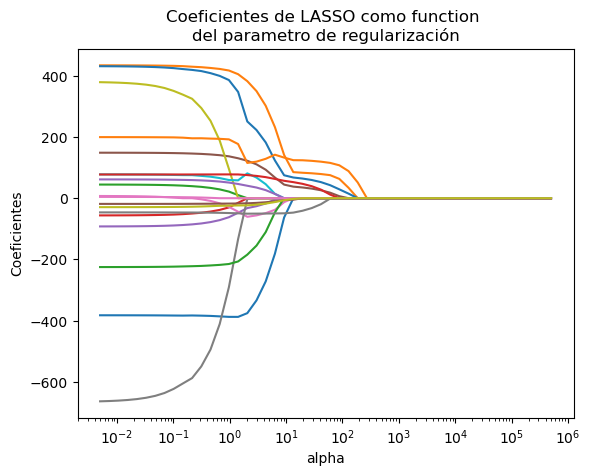

In [47]:

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("Coeficientes")
plt.title("Coeficientes de LASSO como function \n" "del parametro de regularización")
plt.axis("tight")
plt.show()



### Lasso con validación cruzada

Realizamos una validación cruzada de 5 veces para elegir el mejor alfa, reajustar el modelo, calcular el error de prueba asociado e imprimir los mejores coeficientes de modelos.


In [49]:

# Usamos cross-validation para dividir la muestra en training y validation sets
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=100000, random_state=100)
lassocv.fit(X_train_transformed, y_train)
print("Alpha óptimo:", lassocv.alpha_.round(2))

# Ahora estimamos nuevamente el modelo con el alpha (lambda) óptimo
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train_transformed, y_train)
lasso_pred = lasso.predict(X_test_transformed)

print("Mean Squared Error de testeo (MSE test):", round(mean_squared_error(y_test, lasso_pred),2))
print("Coeficientes del mejor modelo:")
pd.Series(lasso.coef_, index=X_train_transformed.columns)

# Para guardarlo en un dataframe...
coeficientes_finales = pd.DataFrame([np.array(X_train_transformed.columns.tolist()),np.round(lasso.coef_,2)]).T
coeficientes_finales.columns = ['feature','coeficiente']
print(f"El modelo final cuenta con: {coeficientes_finales[coeficientes_finales['coeficiente']!=0].shape[0]}", 'features con coef distinto de 0')
coeficientes_finales


Alpha óptimo: 2.98
Mean Squared Error de testeo (MSE test): 112777.53
Coeficientes del mejor modelo:
El modelo final cuenta con: 14 features con coef distinto de 0


,feature,coeficiente
0,AtBat,-333.66
1,Hits,349.92
2,HmRun,0.0
3,Runs,-0.0
4,RBI,-26.12
5,Walks,110.56
6,Years,-56.08
7,CAtBat,-0.0
8,CHits,0.0
9,CHmRun,67.32



Ahora algunos coeficientes son exactamente cero. Por lo tanto, **Lasso** tiene una ventaja sustancial sobre la regresión de Ridge en que realiza una **selección de las variables del modelo**.  
Para completar la imagen, necesitamos los resultados de validación cruzada correspondientes de la regresión de la Ridge.



### Performance de los modelos regularizados con Ridge y con Lasso con Cross-validation:

#### Rehacemos Ridge con validación cruzada

Nuevamente, realizamos una validación cruzada con k=5 para elegir el mejor alfa, reajustar el modo, calcular el error de prueba asociado e imprimir los mejores coeficientes de modelos. Esta vez regularizando con `RidgeCV`


In [51]:

ridgecv = RidgeCV(alphas=alphas, cv=5).fit(X_train_transformed, y_train)
print("El mejor alpha:", ridgecv.alpha_.round(2))

# Ahora con el alpha óptimo, volvemos a estimar nuestro modelo
ridge = Ridge(alpha=ridgecv.alpha_)
ridge = ridge.fit(X_train_transformed, y_train)
ridge_pred = ridge.predict(X_test_transformed)
mse_ridge = mean_squared_error(y_test, ridge_pred)

print("Mean Squared Error de testeo (MSE test):", round(mse_ridge,2))

print("Coeficientes del mejor modelo:")
print(pd.Series(ridgecv.coef_, index = X_train_transformed.columns).round(2))


El mejor alpha: 1.41
Mean Squared Error de testeo (MSE test): 115966.66
Coeficientes del mejor modelo:
AtBat         -331.35
Hits           355.63
HmRun           19.66
Runs           -12.26
RBI            -63.62
Walks          127.81
Years          -53.06
CAtBat        -196.81
CHits          163.77
CHmRun          80.53
CRuns          246.48
CRBI           145.66
CWalks        -185.36
PutOuts         76.48
Assists         48.71
Errors         -22.70
League_N         3.57
Division_W     -53.59
NewLeague_N    -29.08
dtype: float64


In [53]:

print("Mean Squared Error de testeo (MSE test) con MCO: ", round(mse_lin,2))
print("Mean Squared Error de testeo (MSE test) con Ridge: ", round(mean_squared_error(y_test, ridge_pred),2))
print("Mean Squared Error de testeo (MSE test) con Lasso: ", round(mean_squared_error(y_test, lasso_pred),2))


Mean Squared Error de testeo (MSE test) con MCO:  123843.3
Mean Squared Error de testeo (MSE test) con Ridge:  115966.66
Mean Squared Error de testeo (MSE test) con Lasso:  112777.53



### Resumen

Con alpha elegido por validación cruzada el error cuadrático medio del Lasso es un poco mejor que el de regresión de Ridge.

A su vez, Lasso tiene una gran ventaja sobre la regresión de Ridge, ya que produce modelos más simples e interpretables que involucran solo a un subconjunto de predictores.
